In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import seaborn as sns

properties_df = pd.read_csv("/workspaces/chicago-crime-property-analysis/HomeHarvest_Chicago_10Years.csv")

/tmp/ipykernel_5213/611010318.py:7: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  properties_df = pd.read_csv("/workspaces/chicago-crime-property-analysis/HomeHarvest_Chicago_10Years.csv")


In [2]:
missing_percentage = (properties_df.isnull().sum() / len(properties_df)) * 100
print(missing_percentage)

property_url       0.000000
mls               47.075499
mls_id            47.075499
status             0.000000
style              0.150471
street             0.012698
unit              46.795826
city               0.000000
state              0.000000
zip_code           0.002222
beds              28.657729
full_baths        26.281622
half_baths        80.403541
sqft              42.306459
year_built        32.971864
days_on_mls       61.525788
list_price        47.105974
list_date         47.075499
sold_price         0.001270
last_sold_date     0.000000
lot_sqft          53.635905
price_per_sqft    42.992467
latitude           0.279990
longitude          0.279990
stories           41.958217
hoa_fee           67.915724
parking_garage    45.268895
primary_photo     25.607042
alt_photos        25.606725
dtype: float64


In [3]:
correlation = properties_df[['sold_price', 'list_price']].corr()
print(correlation)

            sold_price  list_price
sold_price    1.000000    0.992494
list_price    0.992494    1.000000


In [4]:
# Display basic information about the dataframe
print(properties_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315011 entries, 0 to 315010
Data columns (total 29 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   property_url    315011 non-null  object 
 1   mls             166718 non-null  object 
 2   mls_id          166718 non-null  object 
 3   status          315011 non-null  object 
 4   style           314537 non-null  object 
 5   street          314971 non-null  object 
 6   unit            167599 non-null  object 
 7   city            315011 non-null  object 
 8   state           315011 non-null  object 
 9   zip_code        315004 non-null  float64
 10  beds            224736 non-null  float64
 11  full_baths      232221 non-null  float64
 12  half_baths      61731 non-null   float64
 13  sqft            181741 non-null  float64
 14  year_built      211146 non-null  float64
 15  days_on_mls     121198 non-null  float64
 16  list_price      166622 non-null  float64
 17  list_date 

In [5]:
# Display summary statistics
print(properties_df.describe())

            zip_code           beds     full_baths    half_baths  \
count  315004.000000  224736.000000  232221.000000  61731.000000   
mean    60629.065310       3.425108       2.021058      1.109167   
std        27.504734       3.270039       2.655686      0.586877   
min     60005.000000       0.000000       1.000000      0.000000   
25%     60614.000000       2.000000       1.000000      1.000000   
50%     60628.000000       3.000000       2.000000      1.000000   
75%     60643.000000       4.000000       2.000000      1.000000   
max     61250.000000     999.000000     999.000000     64.000000   

               sqft     year_built    days_on_mls    list_price    sold_price  \
count  1.817410e+05  211146.000000  121198.000000  1.666220e+05  3.150070e+05   
mean   1.951361e+03    1947.695936      89.849445  4.167316e+05  7.232211e+05   
std    8.546879e+03      40.491637      84.445122  4.486268e+05  5.954148e+06   
min    0.000000e+00    1615.000000       0.000000  1.000000e+00

In [6]:
# Check for missing values
print(properties_df.isnull().sum())

property_url           0
mls               148293
mls_id            148293
status                 0
style                474
street                40
unit              147412
city                   0
state                  0
zip_code               7
beds               90275
full_baths         82790
half_baths        253280
sqft              133270
year_built        103865
days_on_mls       193813
list_price        148389
list_date         148293
sold_price             4
last_sold_date         0
lot_sqft          168959
price_per_sqft    135431
latitude             882
longitude            882
stories           132173
hoa_fee           213942
parking_garage    142602
primary_photo      80665
alt_photos         80664
dtype: int64


In [7]:
columns_to_drop = ['hoa_fee','unit','half_baths','full_baths', 'beds', 'mls', 'mls_id', 'stories','parking_garage','primary_photo','alt_photos', 'property_url', 'state']
properties_df = properties_df.drop(columns=columns_to_drop)

In [9]:
properties_df.describe()

,zip_code,sqft,year_built,days_on_mls,list_price,sold_price,lot_sqft,price_per_sqft,latitude,longitude
count,315004.000000,1.817410e+05,211146.000000,121198.000000,1.666220e+05,3.150070e+05,1.460520e+05,179580.000000,314129.000000,314129.000000
mean,60629.065310,1.951361e+03,1947.695936,89.849445,4.167316e+05,7.232211e+05,3.120968e+04,240.220654,41.881241,-87.674300
std,27.504734,8.546879e+03,40.491637,84.445122,4.486268e+05,5.954148e+06,2.081856e+06,1154.245953,0.087881,0.324043
min,60005.000000,0.000000e+00,1615.000000,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,0.000000,32.720909,-115.986181
25%,60614.000000,1.089000e+03,1915.000000,46.000000,1.990000e+05,1.899000e+05,3.125000e+03,129.000000,41.822988,-87.706699
50%,60628.000000,1.472000e+03,1947.000000,66.000000,3.100000e+05,3.079000e+05,3.750000e+03,206.000000,41.898367,-87.664055
75%,60643.000000,2.200000e+03,1982.000000,104.000000,4.900000e+05,4.900000e+05,4.622000e+03,297.000000,41.944243,-87.635423
max,61250.000000,1.923400e+06,2023.000000,2144.000000,3.000000e+07,3.673000e+08,2.766060e+08,308000.000000,46.045219,87.686370


In [10]:
#Calculate the average sold price for each property type
avg_sold_price_by_type = properties_df.groupby('style')['sold_price'].mean()
print("Average Sold Price by Property Type:")
print(avg_sold_price_by_type)

Average Sold Price by Property Type:
style
COMMERCIAL                     1.239094e+06
CONDO                          1.385904e+06
CONDOS                         4.311338e+05
CONDO_TOWNHOME_ROWHOME_COOP    3.735877e+05
DUPLEX_TRIPLEX                          NaN
FARM                           1.466667e+04
LAND                           3.054615e+05
MOBILE                         2.400000e+04
MULTI_FAMILY                   4.345006e+05
OTHER                          2.166860e+06
SINGLE_FAMILY                  4.210251e+05
TOWNHOMES                      5.493145e+05
Name: sold_price, dtype: float64


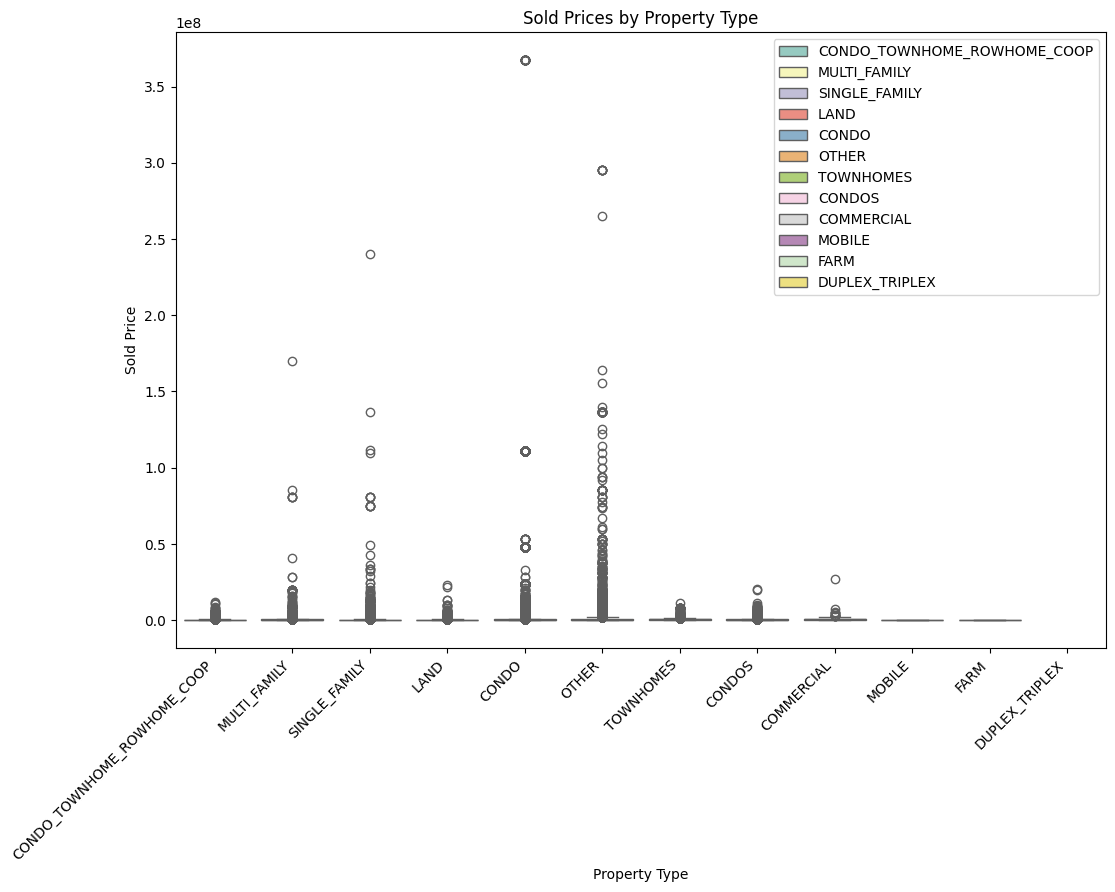

In [11]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='style', y='sold_price', data=properties_df, hue='style', palette='Set3', dodge=False)
plt.xlabel('Property Type')
plt.ylabel('Sold Price')
plt.title('Sold Prices by Property Type')
plt.xticks(rotation=45, ha='right')
plt.legend(title=None)
plt.show()

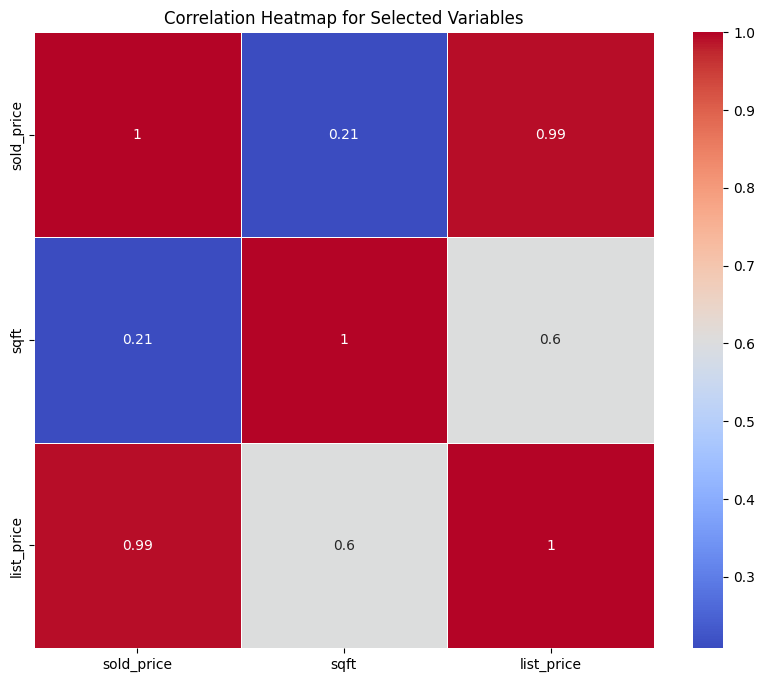

In [12]:
plt.figure(figsize=(10, 8))
selected_variables = ['sold_price', 'sqft', 'list_price']
sns.heatmap(properties_df[selected_variables].corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap for Selected Variables')
plt.show()

In [13]:
size_stats = properties_df['sqft'].describe()
print("Property Size Statistics:")
print(size_stats)

Property Size Statistics:
count    1.817410e+05
mean     1.951361e+03
std      8.546879e+03
min      0.000000e+00
25%      1.089000e+03
50%      1.472000e+03
75%      2.200000e+03
max      1.923400e+06
Name: sqft, dtype: float64


In [14]:
summary_stats = properties_df['sqft'].describe()
print(summary_stats)

count    1.817410e+05
mean     1.951361e+03
std      8.546879e+03
min      0.000000e+00
25%      1.089000e+03
50%      1.472000e+03
75%      2.200000e+03
max      1.923400e+06
Name: sqft, dtype: float64


In [15]:
# Display the count of properties in each zip code
properties_count_by_zip = properties_df['zip_code'].value_counts()
print("Properties Count by Zip Code:")
print(properties_count_by_zip)

Properties Count by Zip Code:
zip_code
60614.0    14771
60657.0    13604
60611.0    11433
60618.0    11392
60647.0    11348
           ...  
60458.0        1
60026.0        1
60456.0        1
60714.0        1
60005.0        1
Name: count, Length: 97, dtype: int64


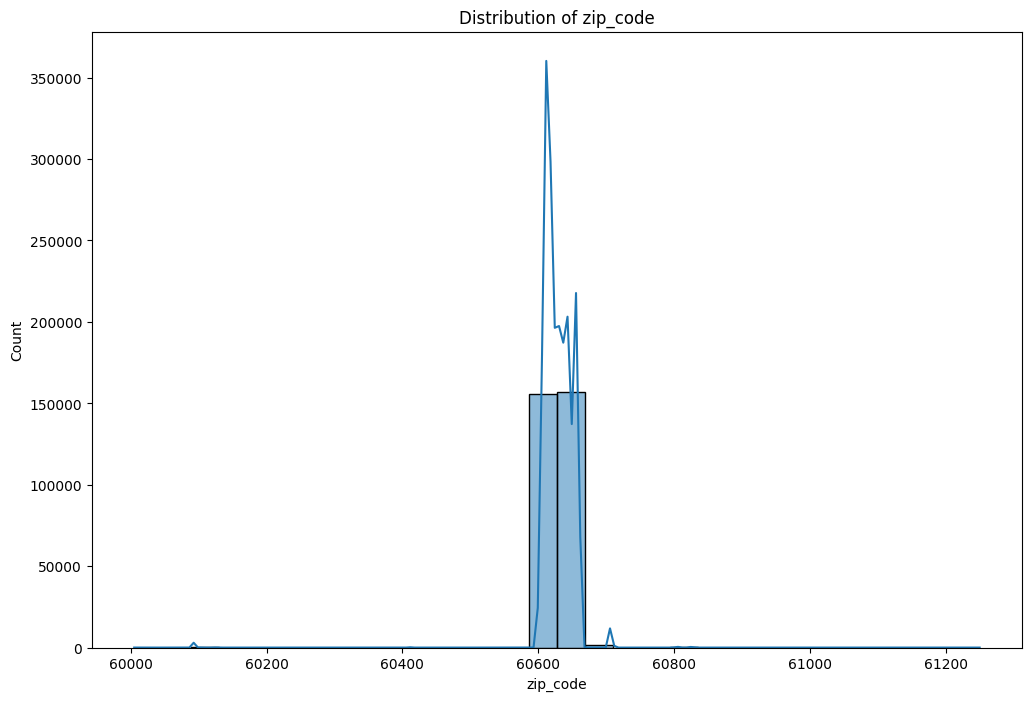

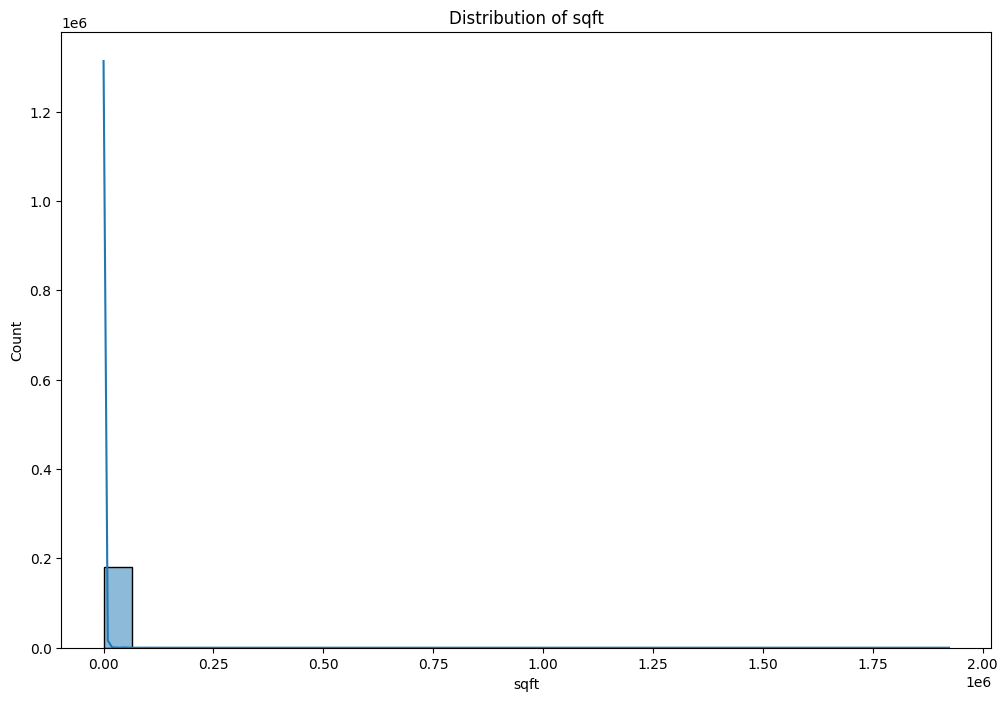

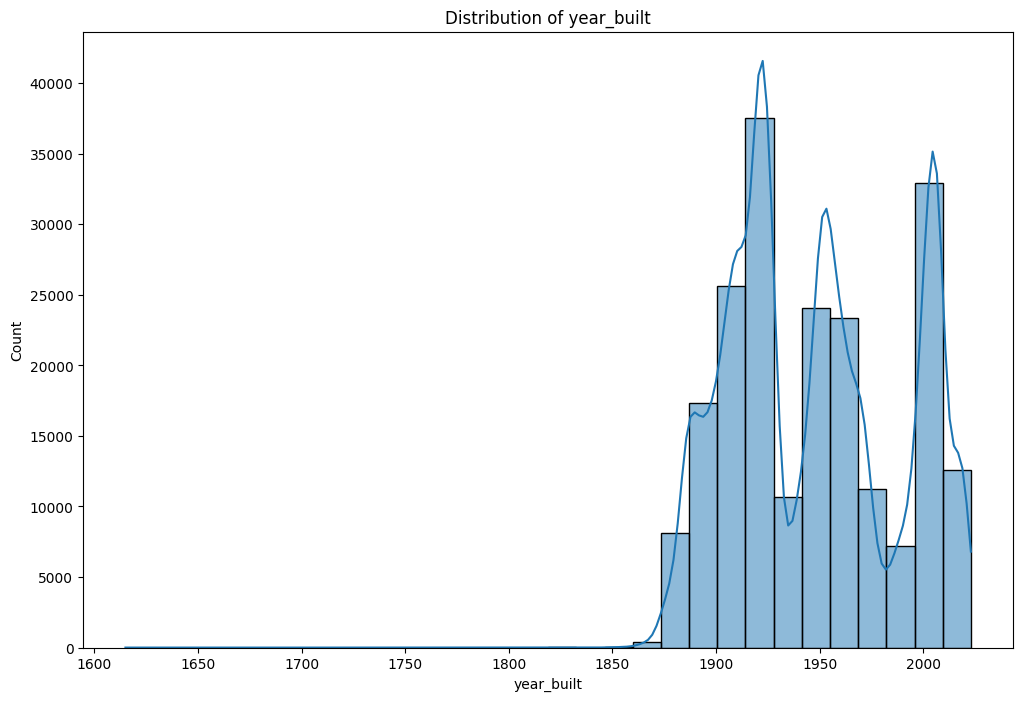

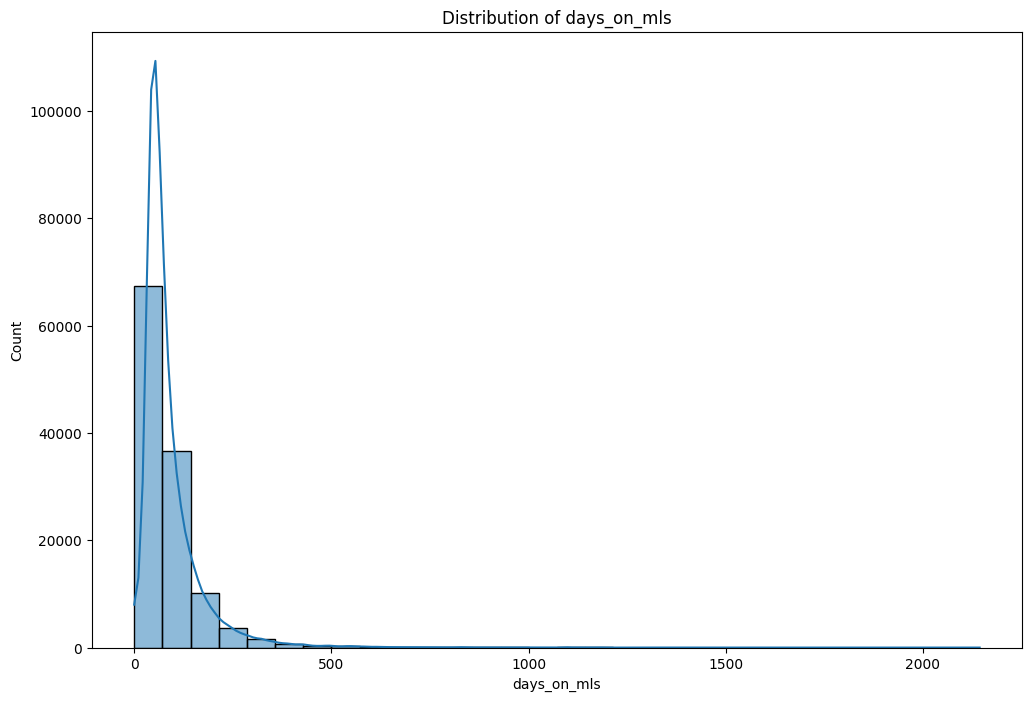

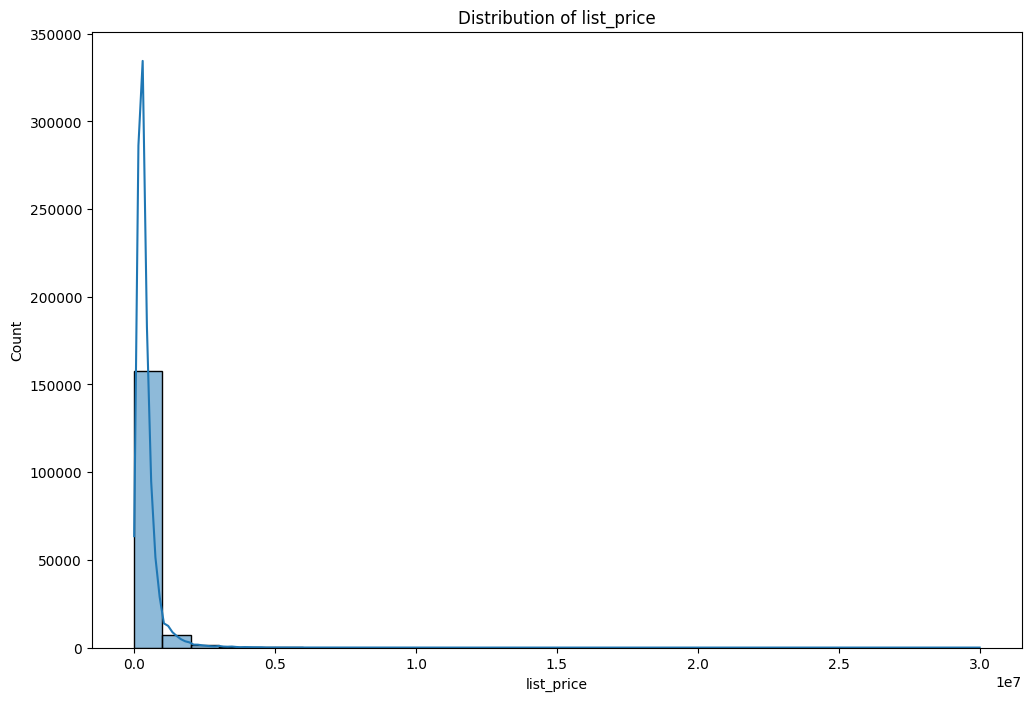

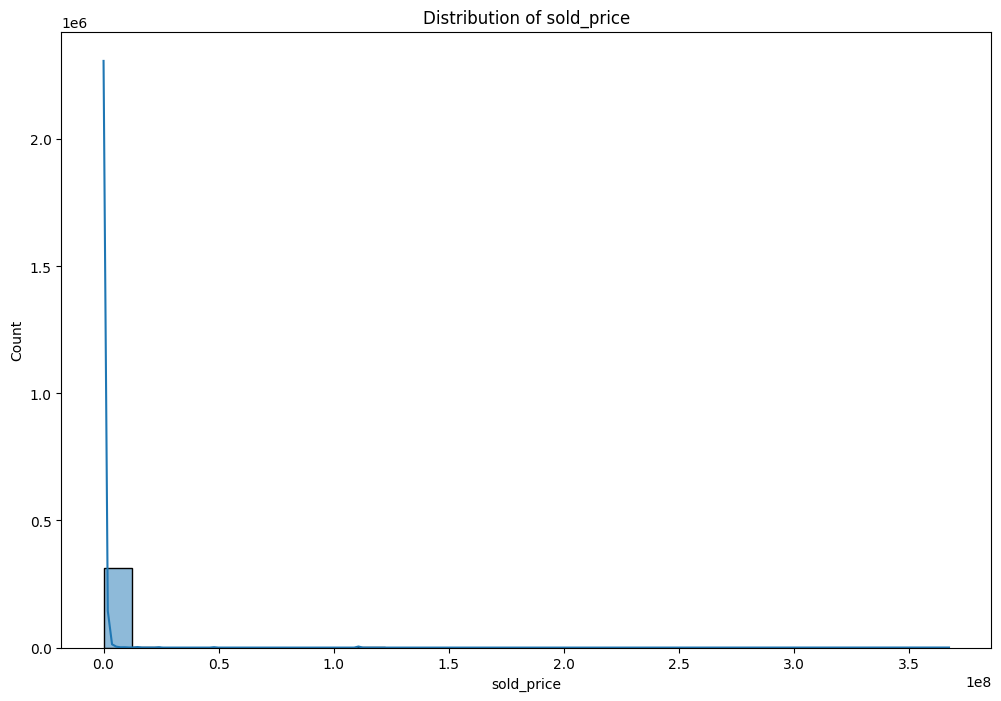

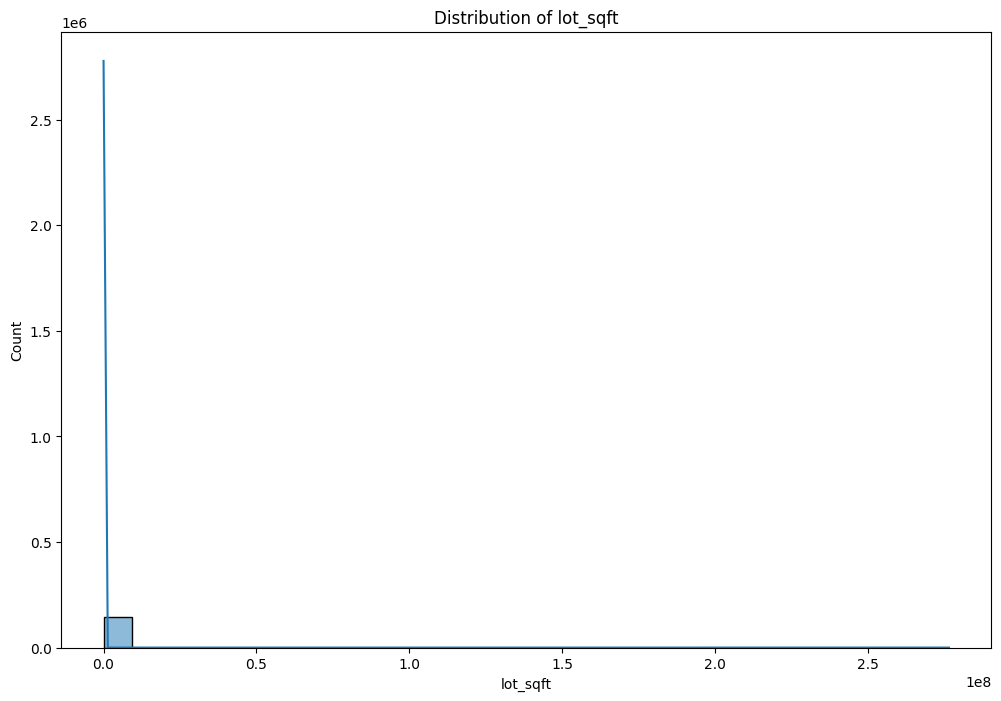

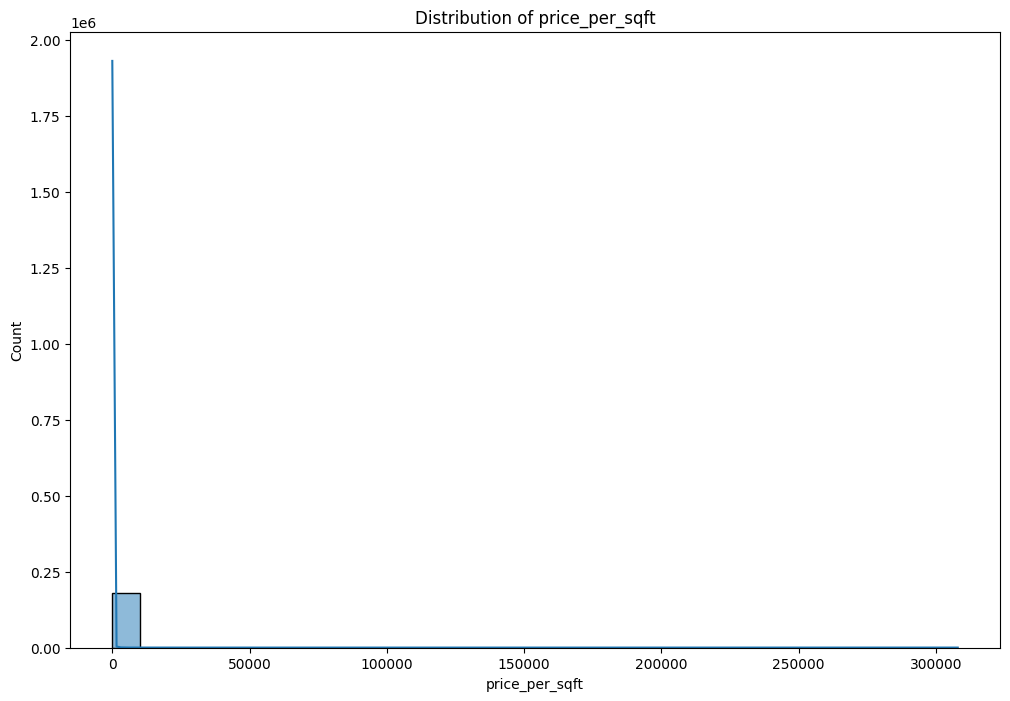

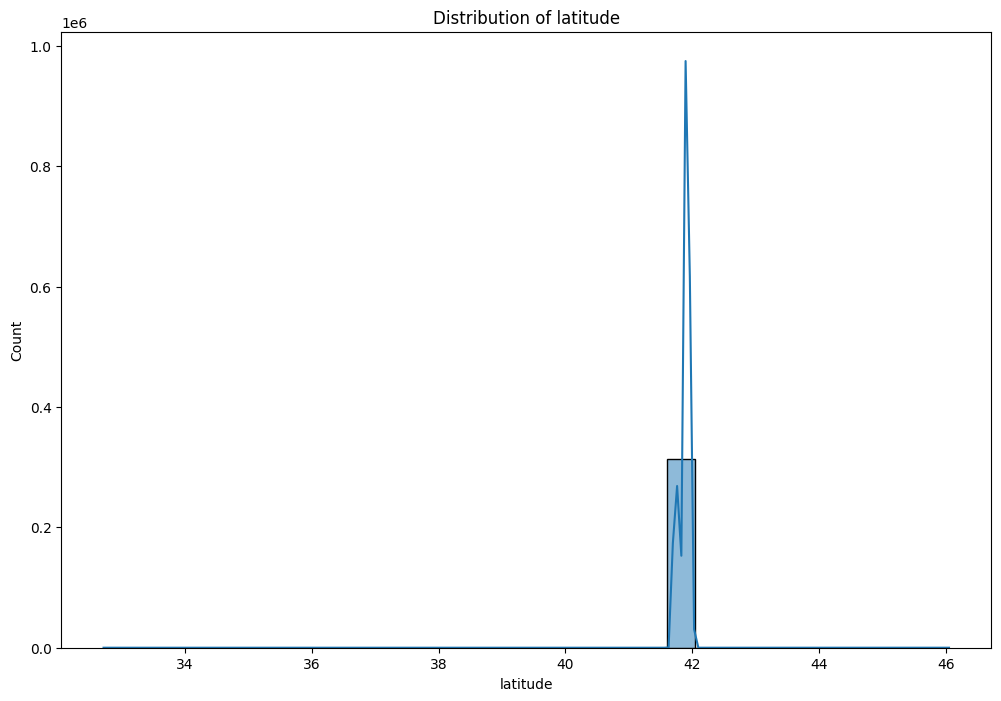

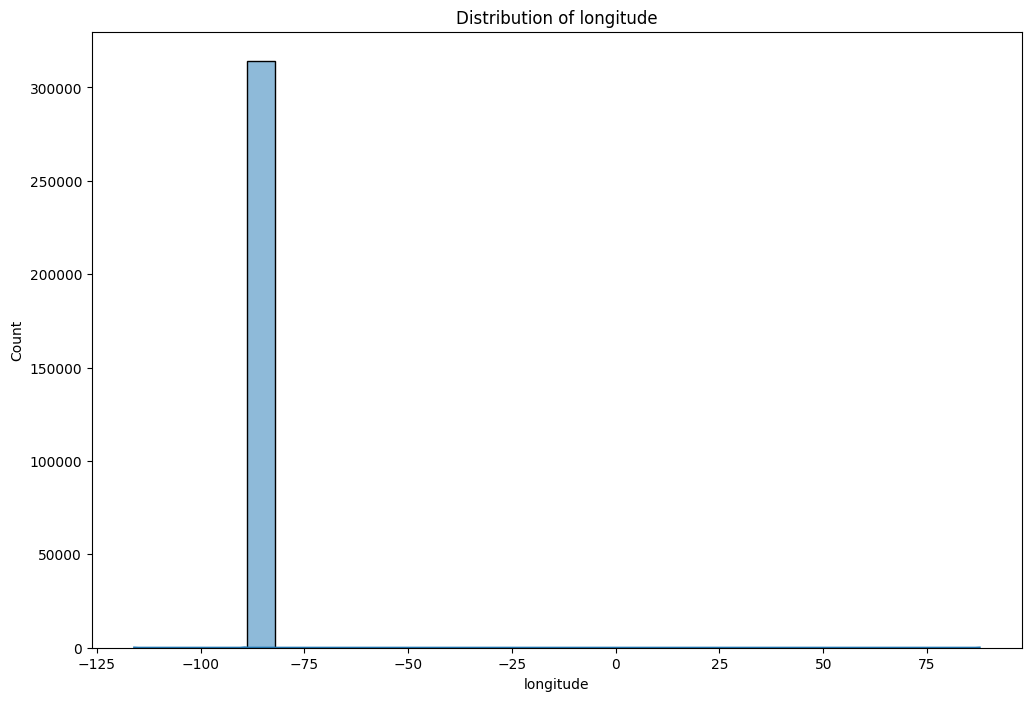

In [17]:
num_cols = properties_df.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    plt.figure(figsize=(12, 8))
    sns.histplot(properties_df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

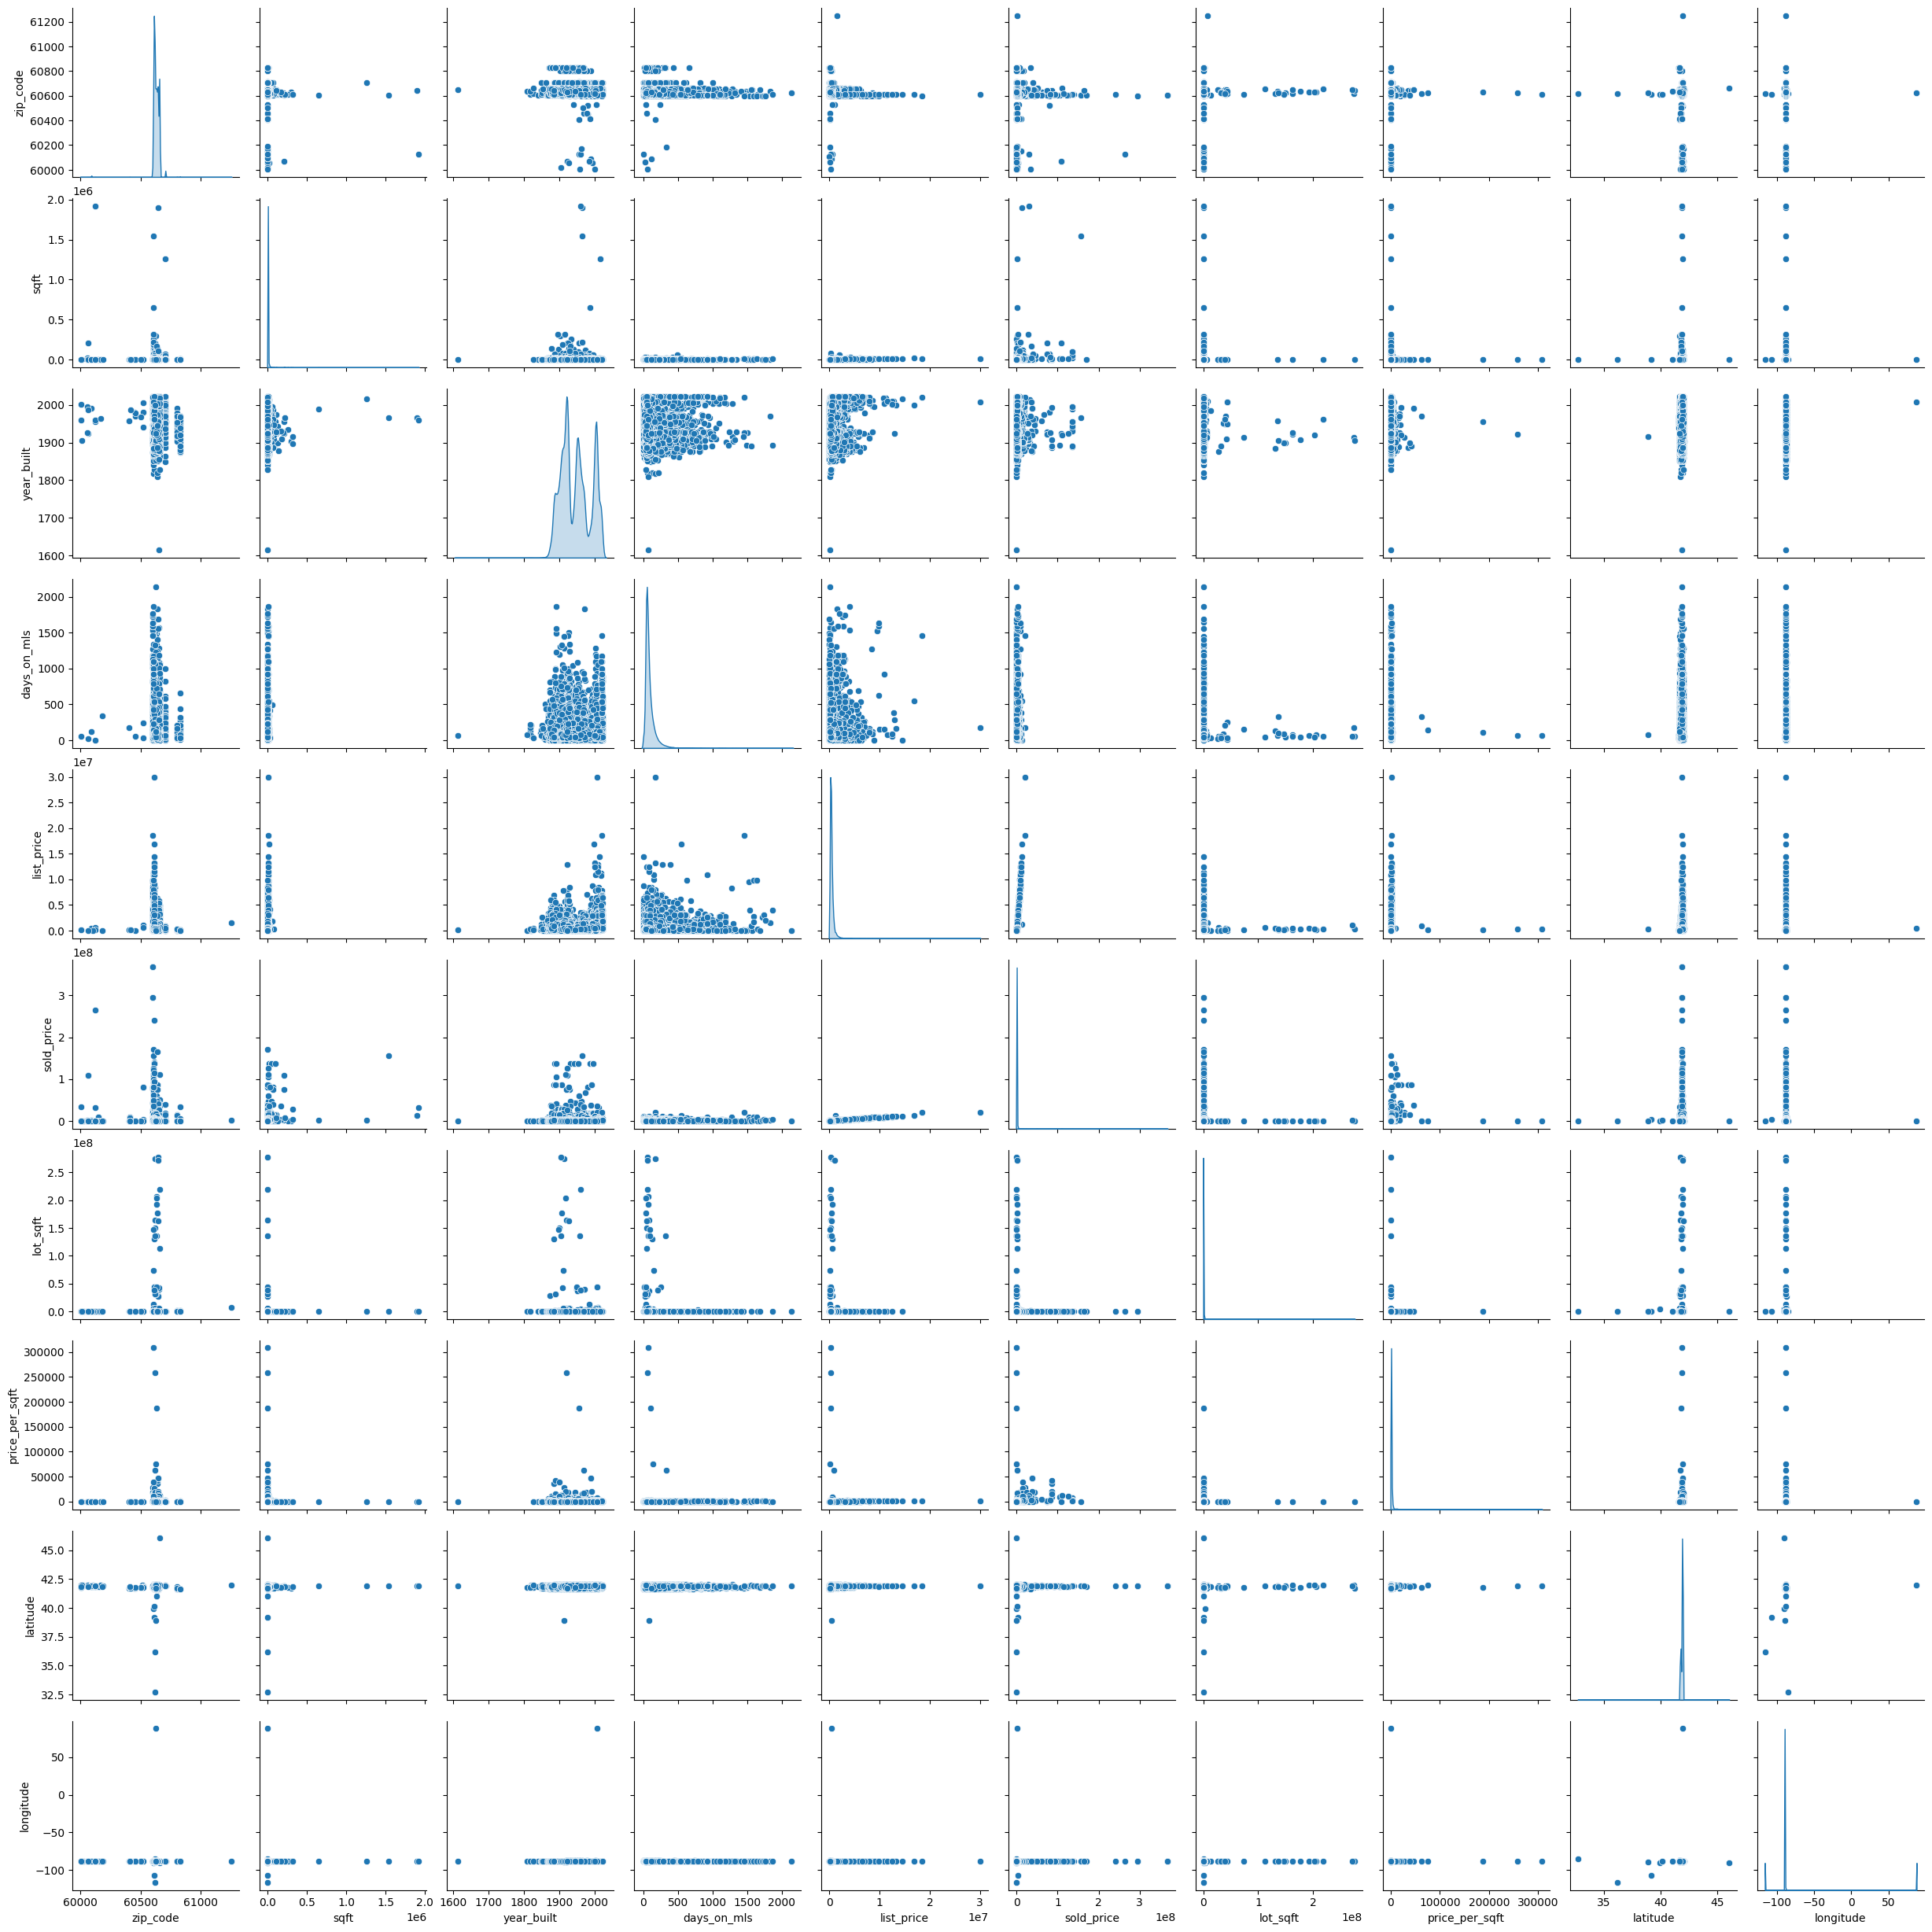

In [18]:
# Explore relationships between variables
sns.pairplot(properties_df[num_cols], diag_kind='kde')  # Use kernel density estimation for diagonal plots
plt.show()

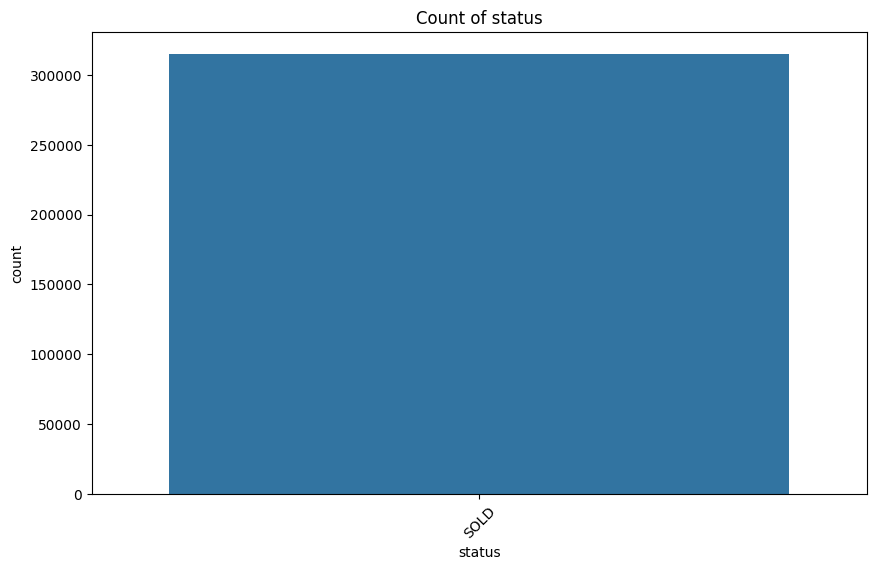

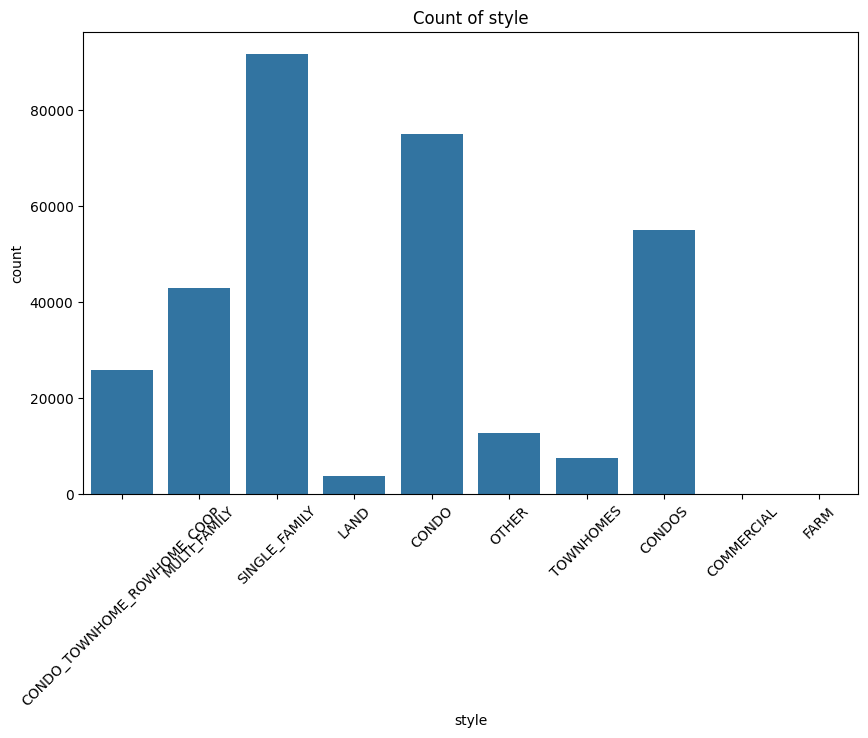

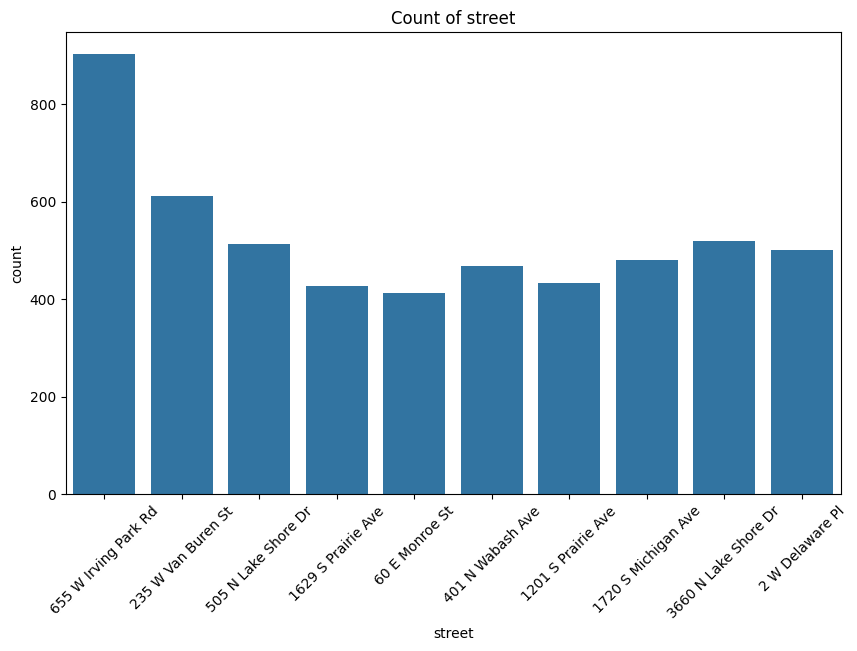

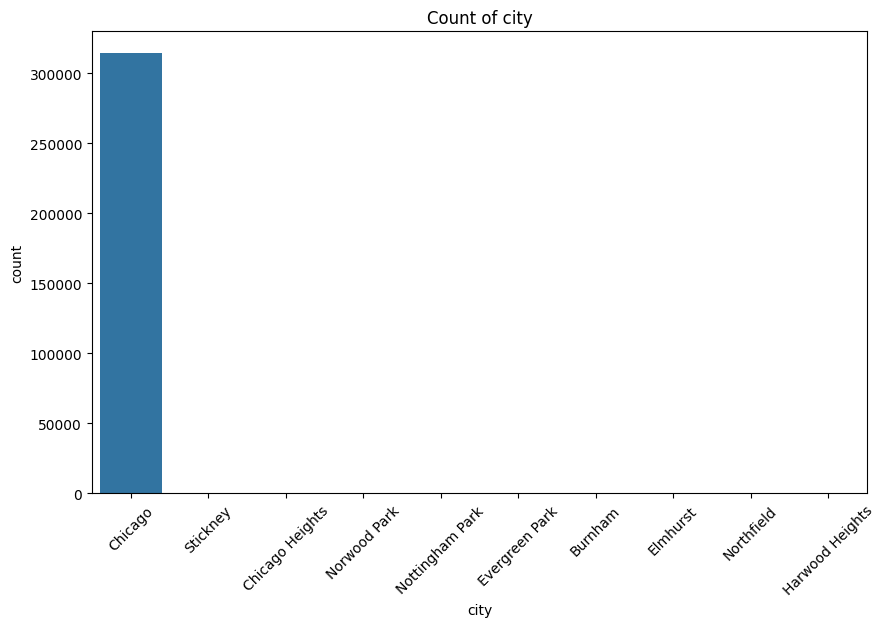

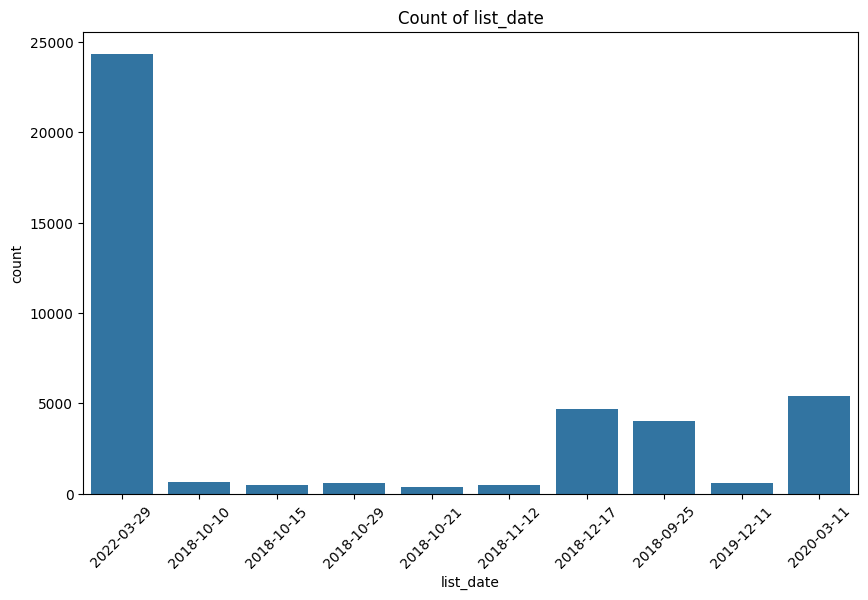

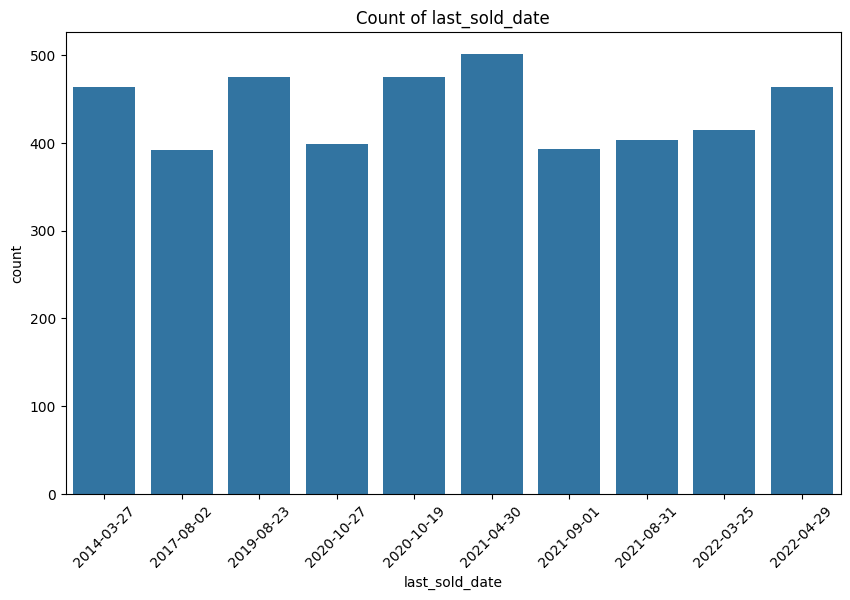

In [19]:
#Explore categorical variables
cat_cols = properties_df.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    top_categories = properties_df[col].value_counts().nlargest(10)  # Display top 10 categories
    sns.countplot(x=col, data=properties_df[properties_df[col].isin(top_categories.index)])
    plt.title(f'Count of {col}')
    plt.xticks(rotation=45)
    plt.show()